# 3장 24번-1

그래프가 인접 행렬로 표현되어 있다.

vertex=
['A','B','C','D','E','F','G','H']

adjMat
[[0,1,1,0,0,0,0,0],

[1,0,0,1,0,0,0],

[1,0,0,1,1,0,0,0],

[0,1,1,0,0,1,0,0],

[0,0,1,0,0,0,1,1],

[0,0,0,1,0,0,0,0],

[0,0,0,0,1,0,0,1],

[0,0,0,0,1,0,1,0]]

이 그래프에 대한 깊이 우선 탐색 알고리즘을 구현하라

## 코드

In [2]:
from collections import deque

def bfs(graph, start_vertex):
    num_vertices = len(graph)
    visited = [False] * num_vertices
    queue = deque()
    result = []

    queue.append(start_vertex)

    while queue:
        v = queue.popleft()
        if not visited[v]:
            result.append(v)
            visited[v] = True

        for i in range(num_vertices):
            if graph[v][i] == 1 and not visited[i]:
                queue.append(i)

    return result

vertex = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
adjMat = [
    [0, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 0, 0, 0],
    [0, 1, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 1],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 1],
    [0, 0, 0, 0, 1, 0, 1, 0]
]

start_vertex_index = 0 

bfs_result = bfs(adjMat, start_vertex_index)

print("BFS 결과:")
for idx in bfs_result:
    print(vertex[idx], end=' ')
print()

BFS 결과:
A B C D E F G H 


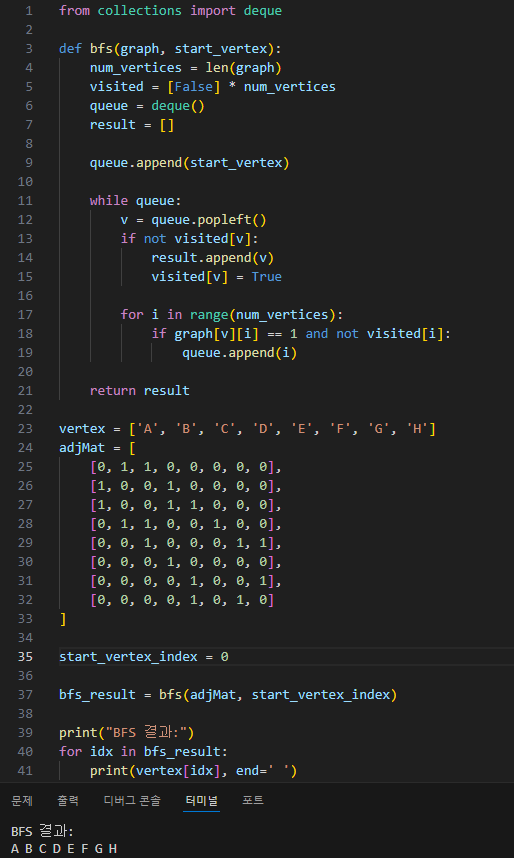

BFS는 그래프의 가까운 부분을 우선적으로 탐색한다.

# 24번-2

그래프가 인접 행렬로 표현되어 있다.

vertex=
['A','B','C','D','E','F','G','H']

adjMat
[[0,1,1,0,0,0,0,0],

[1,0,0,1,0,0,0],

[1,0,0,1,1,0,0,0],

[0,1,1,0,0,1,0,0],

[0,0,1,0,0,0,1,1],

[0,0,0,1,0,0,0,0],

[0,0,0,0,1,0,0,1],

[0,0,0,0,1,0,1,0]]

이 그래프에 대한 너비 우선 탐색 알고리즘을 구현하라

## 코드

In [3]:
def dfs(graph, start_vertex):
    num_vertices = len(graph)
    visited = [False] * num_vertices
    stack = []
    result = []

    stack.append(start_vertex)

    while stack:
        v = stack.pop()
        if not visited[v]:
            result.append(v)
            visited[v] = True

        for i in range(num_vertices - 1, -1, -1):
            if graph[v][i] == 1 and not visited[i]:
                stack.append(i)

    return result

vertex = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
adjMat = [
    [0, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 0, 0, 0],
    [0, 1, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 1],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 1],
    [0, 0, 0, 0, 1, 0, 1, 0]
]

start_vertex_index = 0

dfs_result = dfs(adjMat, start_vertex_index)

print("DFS 결과:")
for idx in dfs_result:
    print(vertex[idx], end=' ')
print()

DFS 결과:
A B D C E G H F 


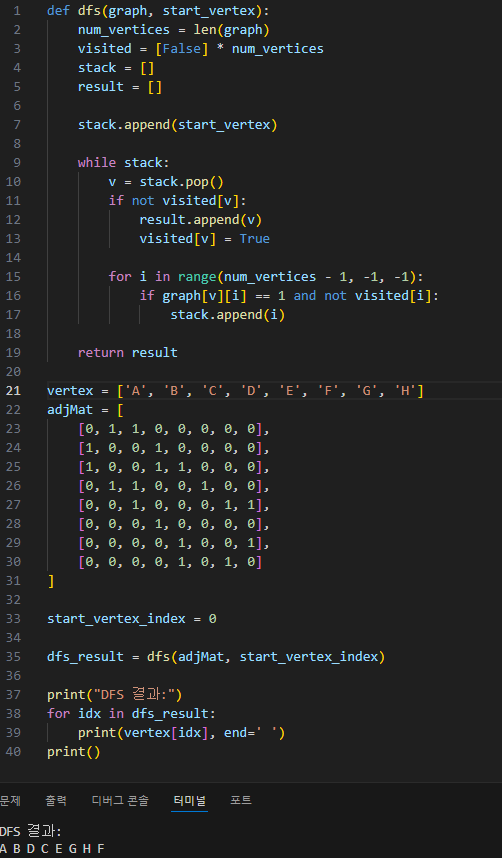

DFS는 그래프의 깊은 부분을 우선적으로 탐색한다

# 3장 26번

신장 트리란 그래프 내의 모든 정점을 포함하는 트리다.

모든 정점들이 연결되어 있고 사이클이 없어야 하며, 그래프의 n개의 정점을 정확히(n-1)개의 간선으로 연결해야한다.

깊이 우선 탐색이나 너비 우선 탐색을 이용하면 신장 트리를 구할 수 있다.

인접 행렬로 표현된 그래프에 대해 신장 트리를 구하는 알고리즘을 설계하라.

단, 깊이 우선 탐색을 이용하라

## 코드

In [4]:
def dfs(graph, v, visited, spanning_tree):
    visited[v] = True
    for i in range(len(graph)):
        
        if graph[v][i] == 1 and not visited[i]:
            spanning_tree[v][i] = 1
            spanning_tree[i][v] = 1
            dfs(graph, i, visited, spanning_tree)

def find_spanning_tree(graph):
    num_vertices = len(graph)   
    visited = [False] * num_vertices
    spanning_tree = [[0] * num_vertices for _ in range(num_vertices)]
    start_vertex = 0
    dfs(graph, start_vertex, visited, spanning_tree)
    
    return spanning_tree

graph = [
    [0, 1, 1, 0, 0],
    [1, 0, 0, 1, 1],
    [1, 0, 0, 1, 0],
    [0, 1, 1, 0, 1],
    [0, 1, 0, 1, 0]
]

spanning_tree = find_spanning_tree(graph)
for row in spanning_tree:
    print(row)

[0, 1, 0, 0, 0]
[1, 0, 0, 1, 0]
[0, 0, 0, 1, 0]
[0, 1, 1, 0, 1]
[0, 0, 0, 1, 0]


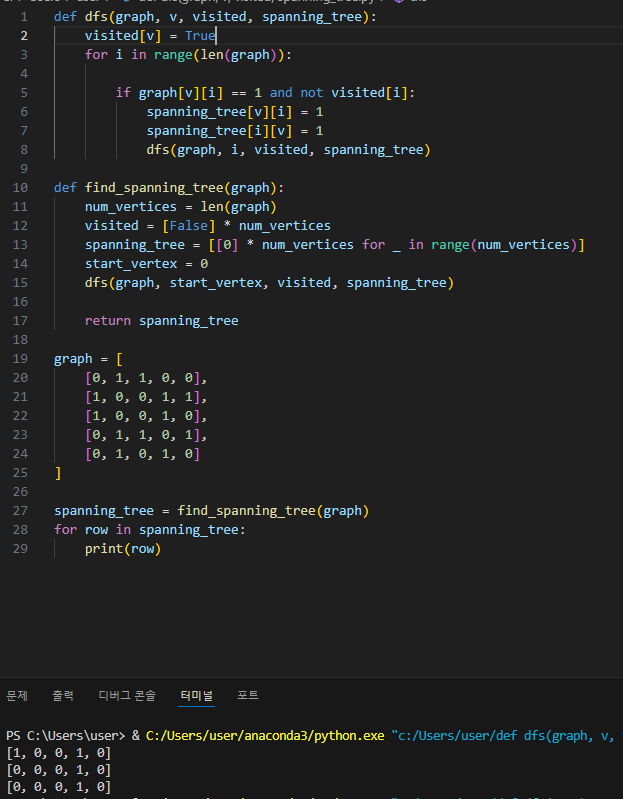